Diyelim ki firma bizden model istiyor ama verilerimiz yok. veri setimiz hazır değil ama bizim çalışmaya başlamamız gerekiyor  . o zaman kendi  veri setimizi hazırlayabiliriz .yada araştırma sonucu bulabiliriz.

BU ÇALIŞMADA ÜRÜN KÜMELEME VE ANALİZİ YAPACAĞIZ 

### RASTGELE ÜRÜN VERİSİ OLUŞTURMA 

İSTER GPT LERDEN OLUŞTURULABİLR YADA BİZİM GİBİ BURDAN MANUEL OLUŞTURABİLİRİZ

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram , linkage


#### ürün adi , fiyat ,ortalam puan ,menşei   özellikleri olan bir data oluşturacağız.

In [22]:
np.random.seed(42) # rastgele değer oluşturacak ve rasgelelik değeri 42 olacak 
num_samples=100;

fiyat=np.random.uniform(10,100,num_samples) # 10 ile 1000 arasında 100 tane rasgele fiyat değeri oluşturduk
ortalama_puan=np.random.uniform(1,5,num_samples) # 1 ile 5 arasında 100 tane rasgele puan değeri oluşturduk
mensei=np.random.choice(['Ulke_A','Ulke_B','Ulke_C','Ulke_D'],num_samples) # 4 farklı ülkeden rasgele 100 tane menşei değeri oluşturduk
ürün_adi=['ürün_'+str(i) for i in range(num_samples)] # ürün_0 , ürün_1 , ürün_2 ... ürün_99 şeklinde 100 tane ürün adı oluşturduk

In [23]:
data=pd.DataFrame({
    'ürün_adi':ürün_adi,
    'fiyat':fiyat,
    'ortalama_puan':ortalama_puan,
    'mensei':mensei
})
data.head()

,ürün_adi,fiyat,ortalama_puan,mensei
0,ürün_0,43.708611,1.125717,Ulke_D
1,ürün_1,95.564288,3.545642,Ulke_D
2,ürün_2,75.879455,2.257424,Ulke_C
3,ürün_3,63.879264,3.034283,Ulke_A
4,ürün_4,24.041678,4.630266,Ulke_D


### TEMEL VERİ ANALİZİ


In [24]:
data.describe()  # sayısal değerlerin temel istatistiklerine bakalım 

,fiyat,ortalama_puan
count,100.000000,100.000000
mean,52.316267,2.991327
std,26.774047,1.172445
min,10.496991,1.027809
25%,27.388068,1.968018
50%,51.772821,3.022499
75%,75.718281,4.064734
max,98.819824,4.942602


In [25]:
data.info() #veri tiplerine bakmak için kullnaırız

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ürün_adi       100 non-null    object 
 1   fiyat          100 non-null    float64
 2   ortalama_puan  100 non-null    float64
 3   mensei         100 non-null    object 
dtypes: float64(2), object(2)
memory usage: 3.2+ KB


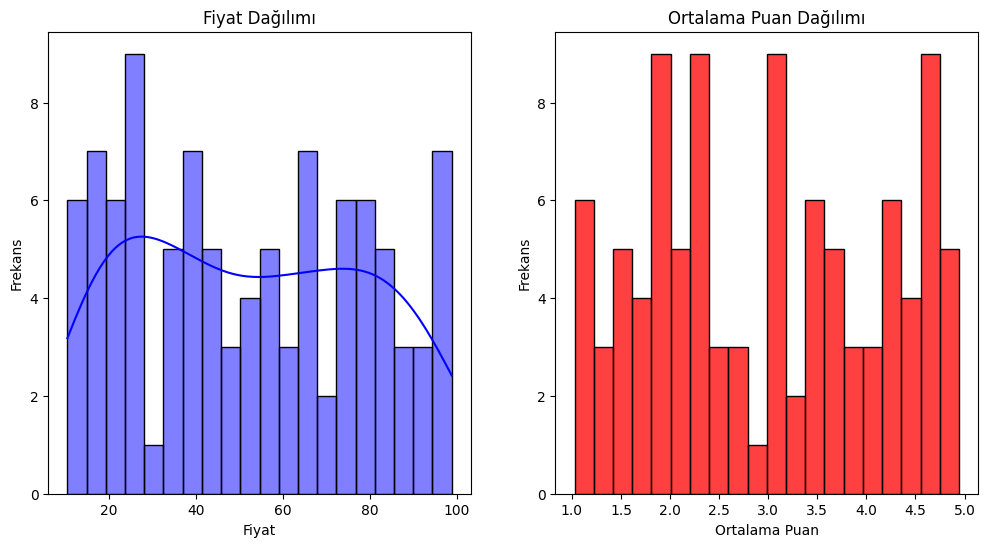

In [26]:
# fiyat ve ortalama puan dağılımı inceleyelim
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(data.fiyat,bins=20, kde=True, color='blue') #bins : kaç aralığa böleceğimiz , kde : eğri çizimi
plt.title('Fiyat Dağılımı')
plt.xlabel('Fiyat')
plt.ylabel('Frekans')

plt.subplot(1,2,2)
sns.histplot(data.ortalama_puan,bins=20, kde=False, color='red') #bins : kaç aralığa böleceğimiz , kde : eğri çizimi
plt.title('Ortalama Puan Dağılımı')
plt.xlabel('Ortalama Puan')
plt.ylabel('Frekans')
plt.show()

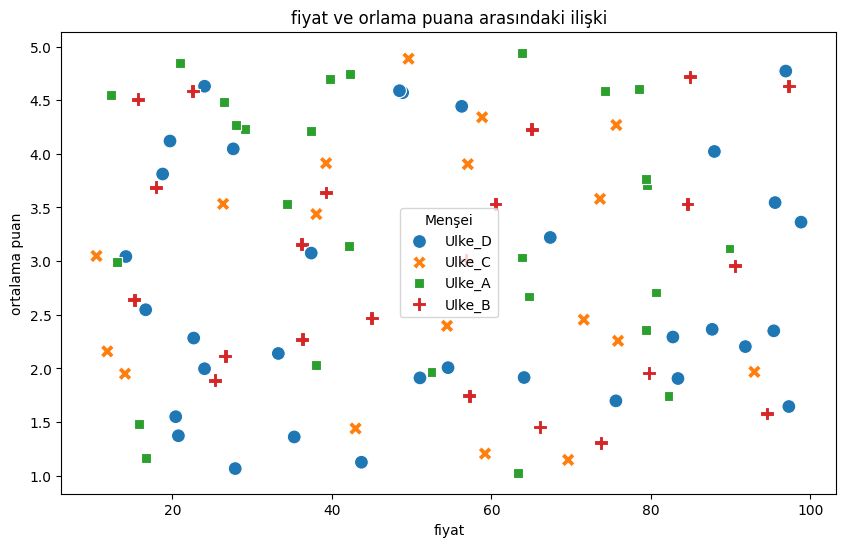

In [28]:
# fiyat ve orlama puana arasındaki ilişkiyi inceleyelim
plt.figure(figsize=(10,6))
sns.scatterplot(x="fiyat",y="ortalama_puan",data=data,hue="mensei",style="mensei",s=100)
plt.title("fiyat ve orlama puana arasındaki ilişki")
plt.xlabel("fiyat")
plt.ylabel("ortalama puan")
plt.legend(title="Menşei")
plt.show()


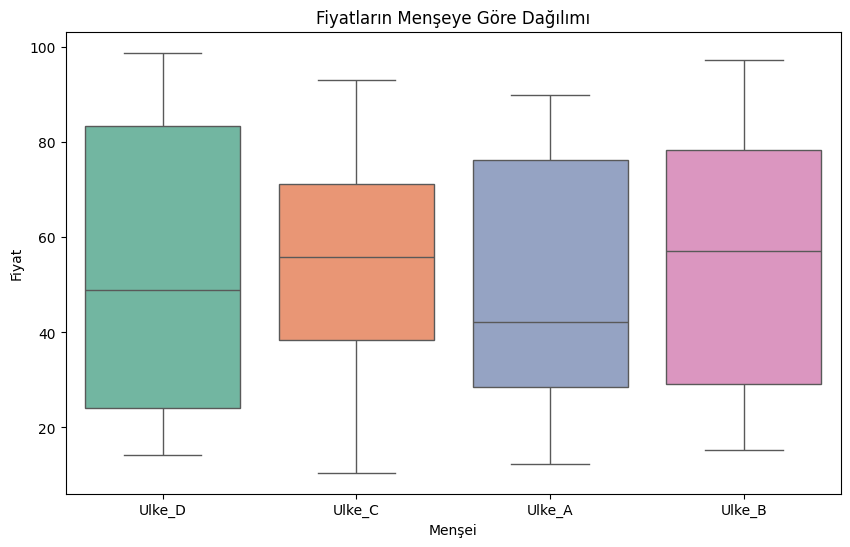

In [32]:
# fiyatlarin menşeye göre dağılımı 
plt.figure(figsize=(10,6))
sns.boxplot(x="mensei",y="fiyat",data=data,hue="mensei",palette="Set2")
plt.title("Fiyatların Menşeye Göre Dağılımı")
plt.xlabel("Menşei")
plt.ylabel("Fiyat")
plt.show()

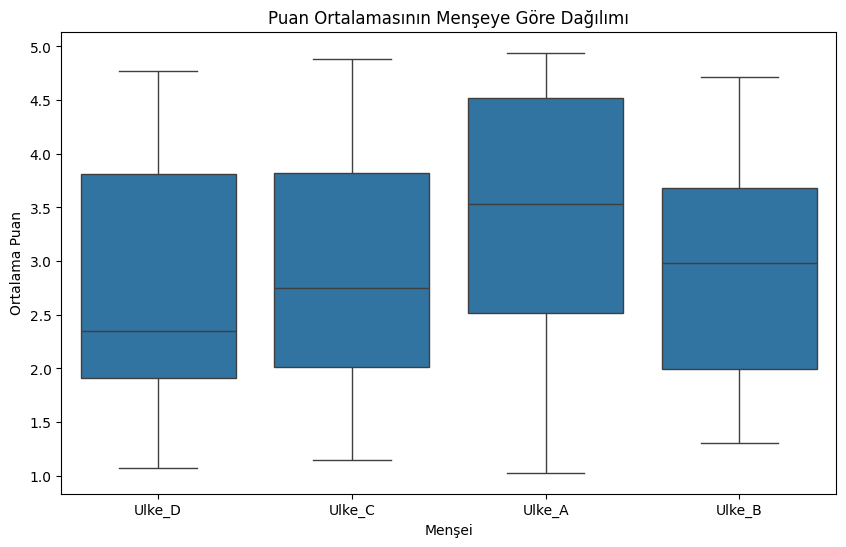

In [34]:
# ortalam puanların menseye göre dağılımı
# fiyatlarin menşeye göre dağılımı 
plt.figure(figsize=(10,6))
sns.boxplot(x="mensei",y="ortalama_puan",data=data)
plt.title("Puan Ortalamasının Menşeye Göre Dağılımı")
plt.xlabel("Menşei")
plt.ylabel("Ortalama Puan")
plt.show()

### K MEANS KÜMELEME VE T-SNE GÖRSELLEŞTİRME

In [ ]:
x=data[['fiyat','ortalama_puan']].values # veriyi numpy array formatına çevirdikk
kmeans = KMeans(n_clusters=4,random_state=42) # 4 küme oluşturmak için
data['kume']=kmeans.fit_predict(x) # her bir verinin hangi kümeye ait olduğunu

In [36]:
data.head()

,ürün_adi,fiyat,ortalama_puan,mensei,kume
0,ürün_0,43.708611,1.125717,Ulke_D,3
1,ürün_1,95.564288,3.545642,Ulke_D,1
2,ürün_2,75.879455,2.257424,Ulke_C,1
3,ürün_3,63.879264,3.034283,Ulke_A,2
4,ürün_4,24.041678,4.630266,Ulke_D,0


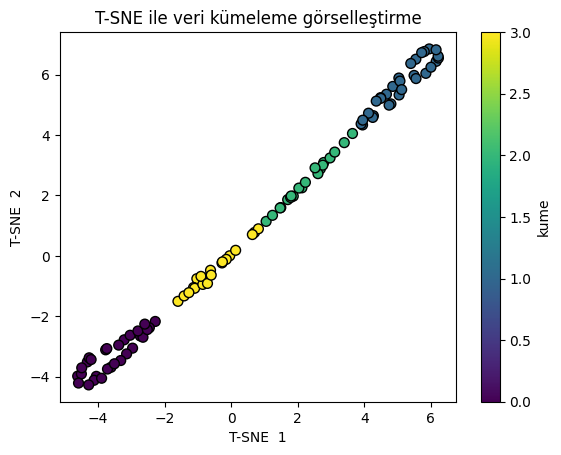

In [37]:
tsne=TSNE(n_components=2,random_state=42) # 2 boyuta indirgeme işlemi
# n_components=2 boyutuna indirgenir
# random_state=0 rastgele sayı üretir
x_tsne=tsne.fit_transform(x)


plt.figure()
plt.scatter(x_tsne[:,0],x_tsne[:,1],c=data['kume'],cmap='viridis',edgecolors='black',marker='o',s=50)
plt.title("T-SNE ile veri kümeleme görselleştirme")
plt.xlabel("T-SNE  1")
plt.ylabel("T-SNE  2")
plt.colorbar(label="kume")
plt.show()

### DENDOGRAM İLE GÖRSELLEŞTİRME

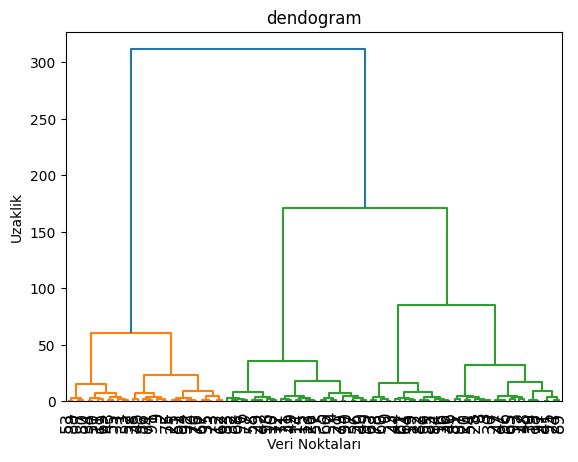

In [39]:
 #en idial veri küme sayısını bulmak için kulllanılır 

linkage_matrix =linkage(x,method='ward') #ward yöntemi ile hiyerarşik kümeleme işlemi
plt.figure()
dendrogram(linkage_matrix,leaf_rotation=90,leaf_font_size=12)
plt.title('dendogram')
plt.xlabel('Veri Noktaları')
plt.ylabel('Uzaklik')
plt.show()

temel olarak iki ana kümeye bölünmüş gibi görünüyor. #ama  istenen skalaya göre  kümeleme işlemi değişebilir  örnek 50 seviyesinde 5 kümeye bölünebilir

veri oluşturduk veryi inceledik veriyi kümeye atadık veriyi dendogram ile görselleştirdik 